## Importando Bibliotecas

In [1]:
import pandas as pd 
from pandas.plotting import autocorrelation_plot
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
print(sns.__version__)

0.9.0


## Baixando e visualizando os dados 

In [4]:
bc_dados = pd.read_csv('alucar.csv')

In [5]:
bc_dados.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
print('Quantidade de linhas e colunas :',bc_dados.shape)

Quantidade de linhas e colunas : (24, 2)


In [7]:
print('Quantidade de dados nulos : ', bc_dados.isna().sum().sum())

Quantidade de dados nulos :  0


In [8]:
bc_dados.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
#mudando de object para datetime
bc_dados['mes'] = pd.to_datetime(bc_dados['mes'])


## Criando Gráficos de vendas do Bruno Carros

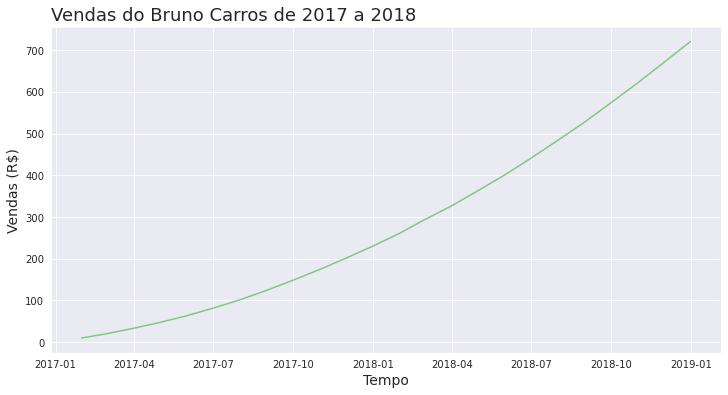

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= bc_dados)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas do Bruno Carros de 2017 a 2018" , loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

### Se cria uma nova coluna para ver o aumento  e aceleração de cada mês 

In [11]:
bc_dados['aumento'] = bc_dados['vendas'].diff()
bc_dados['aceleracao'] = bc_dados['aumento'].diff()
bc_dados.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


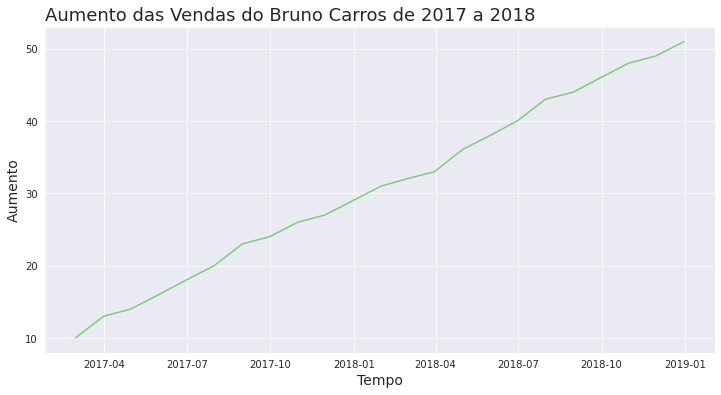

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data= bc_dados)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das Vendas do Bruno Carros de 2017 a 2018" , loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

### Criação de uma função para uma Plotagem mais dinâmica 

In [13]:
def plotar(titulo, labelx,labely, x, y,dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data= dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo , loc = 'left', fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

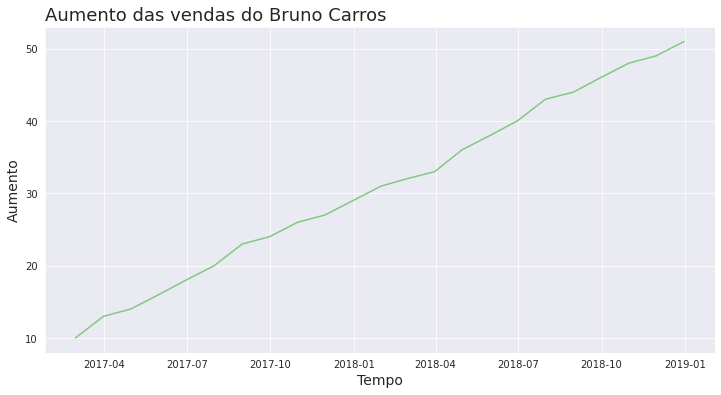

In [14]:
plotar('Aumento das vendas do Bruno Carros','Tempo','Aumento',
       'mes','aumento', bc_dados)

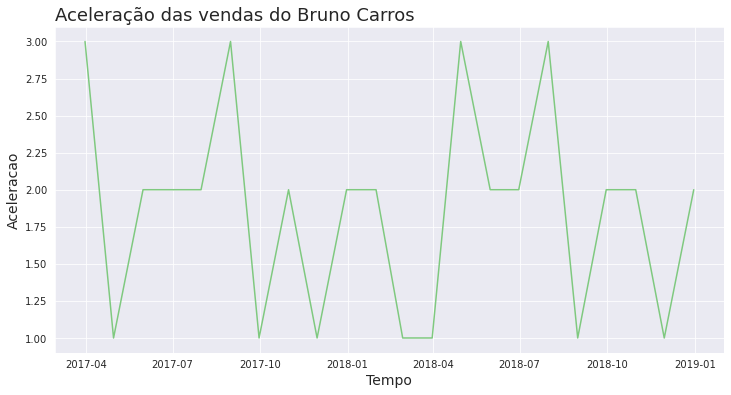

In [15]:
plotar('Aceleração das vendas do Bruno Carros','Tempo','Aceleracao',
       'mes','aceleracao', bc_dados)

### Agora colocamos os 3 Gráficos em uma só plotagem para se ter uma comparação

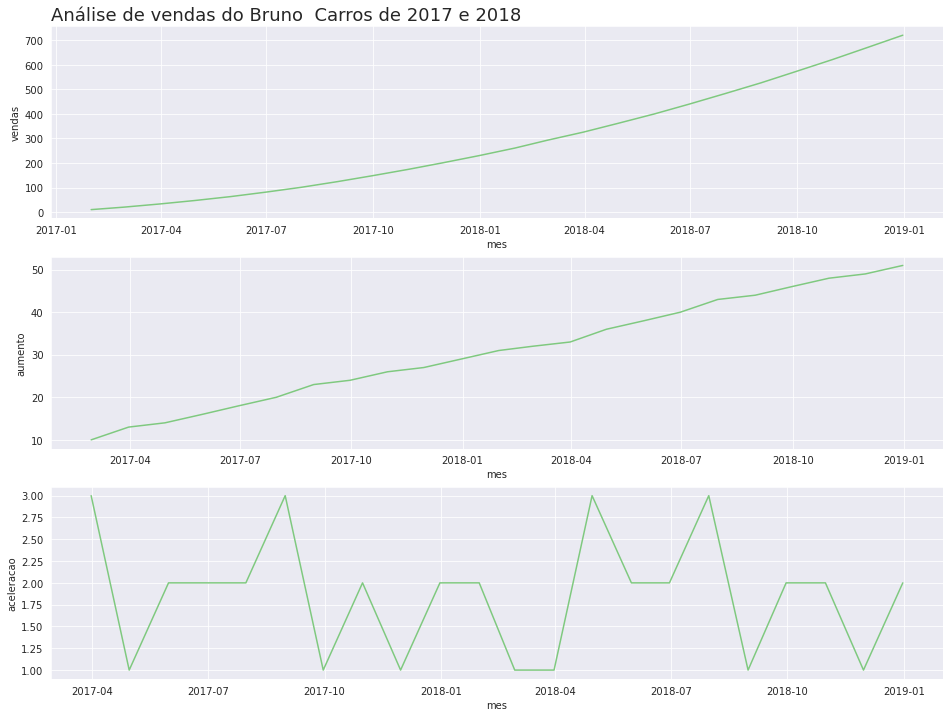

In [16]:
plt.figure(figsize =(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise de vendas do Bruno  Carros de 2017 e 2018", fontsize=18 , loc ='left')
sns.lineplot(x='mes', y='vendas', data= bc_dados)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data= bc_dados)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data= bc_dados)
ax= ax

### Correlação com a biblioteca pandas

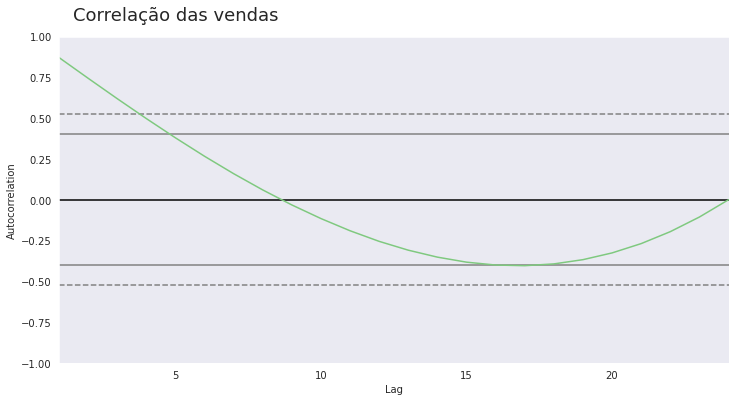

In [17]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação das vendas", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(bc_dados['vendas'])
ax = ax

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

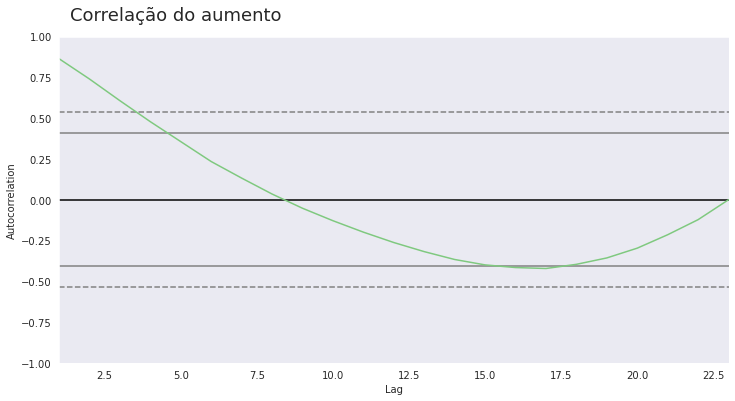

In [18]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação do aumento", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(bc_dados['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

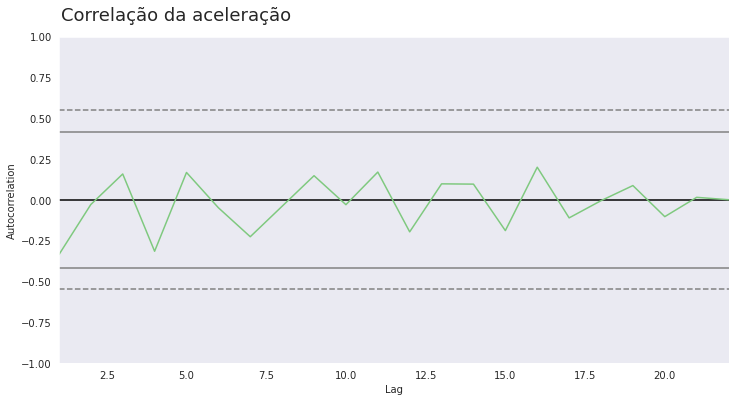

In [19]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação da aceleração", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(bc_dados['aceleracao'][2:])

**Interpretação da autocorrelação**
>
>

**Autocorrelação____________________Interpretação**
>       1	             correlação perfeita positiva
>     0,7 a 0,9       	  correlação forte
>     0,4 a 0,7       	correlação moderada
>     0,2 a 0,4           correlação fraca
>       0                 correlação nula
>     < 0	             correlação negativa
>      -1	             correlação perfeita negativa